In [121]:
import pandas as pd
import statsmodels.formula.api as stats
import statsmodels.api as sm
import numpy as np
import math
import sklearn.metrics as sk
from bs4 import BeautifulSoup
import requests
import json
from os import path
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import random

Ho: B != 0 (There is some relationship between our input variables and the outcome of a men's NCAA basketball game)

Ha: B == 0 (There is no relationship between our input variables and the outcome of a men's NCAA basketball game)

In [101]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

        
def AppendNewStats(HigherRank,LowerRank,bigStats):
    record = ['ConfRecord','TotalRecord']
    for item in HigherRank:
        keyval1 = item+'_HigherRank'
        if item in record:
            keyvalWin = keyval1.replace('Record','Wins')
            keyvalLoss = keyval1.replace('Record','Losses')
            ratio = HigherRank[item].iloc[0].split('_')
            append_value(bigStats, keyvalWin, ratio[0])
            append_value(bigStats, keyvalLoss, ratio[1])
        else:
            append_value(bigStats, keyval1, HigherRank[item].iloc[0])
    for item in LowerRank:
        keyval2 = item+'_LowerRank'
        if item in record:
            keyvalWin = keyval2.replace('Record','Wins')
            keyvalLoss = keyval2.replace('Record','Losses')
            ratio = LowerRank[item].iloc[0].split('_')
            append_value(bigStats, keyvalWin,ratio[0])
            append_value(bigStats, keyvalLoss, ratio[1])
        else:
            append_value(bigStats, keyval2, LowerRank[item].iloc[0])
    return(0)

def GetStats(team,fullstats):
    return(fullstats[fullstats['Name'] == team])
    
def AppendGameResults(df2,num,bigStats):
    for item in df2:
        if item != 'Opponent':
            if item == 'Score':
                scores = df2[item].iloc[num].split('_')
                for i in range(0,2):
                    scores[i] = (scores[i].split())[0]
                differential = int(scores[1])-int(scores[0])
                if df2['Results'].iloc[num] == 'W':
                    differential = abs(differential)
                append_value(bigStats, 'Differntial', differential)
            if item == 'Results' or item == 'PlusMinus':
                keyval = item+'_HigherRank'
            else:
                keyval = item
            append_value(bigStats, keyval, df2[item].iloc[num])
    return(0)
    

In [107]:
listed = []
with open('Matchup\\MatchupStats_2019.csv','r') as f:
    df1 = pd.read_csv(f)

#Replace Win/Loss with binary 1/0
df1 = df1.replace('L',0)
df1 = df1.replace('W',1)

#Get training data
trainX = df1
trainX = trainX.drop(['ConfLosses_LowerRank','ConfLosses_HigherRank','TotalWins_HigherRank','Results_HigherRank','Differntial','Name_HigherRank','Name_LowerRank','Score','PlusMinus_HigherRank','ConfWins_LowerRank'],axis=1)
trainY = df1[['Results_HigherRank']]

#Create logistic regression model
lin_reg = sm.Logit(trainY,trainX).fit()

#Print summary for regression coefficents
lin_reg.summary()

Optimization terminated successfully.
         Current function value: 0.489718
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Results_HigherRank   No. Observations:                 5603
Model:                          Logit   Df Residuals:                     5575
Method:                           MLE   Df Model:                           27
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                  0.1413
Time:                        12:37:02   Log-Likelihood:                -2743.9
converged:                       True   LL-Null:                       -3195.3
Covariance Type:            nonrobust   LLR p-value:                8.449e-173
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
GamesPlayed_HigherRank         0.0825      0.021      3.875      0.000       0.041       0.124
ConfWins_HigherRank           -0.0207      0.021     -0.986      0.324      -0.062       0.020
TotalLosses_HigherRank        -0.1148      0.021     -5.443      0.000      -0.156      -0.073
OffEff_HigherRank              0.0881      0.018      4.878      0.000       0.053       0.123
DefEff_HigherRank             -0.0920      0.022     -4.235      0.000      -0.135      -0.049
Turnovers_HigherRank           0.0161      0.023      0.705      0.481      -0.029       0.061
ForcedTurnovers_HigherRank    -0.0337      0.022     -1.510      0.131      -0.077       0.010
TwoPFGOff_HigherRank          -0.0374      0.015     -2.428      0.015      -0.068      -0.007
TwoPFGDef_HigherRank           0.0383      0.020      1.874      0.061      -0.002       0.078
ThreePFGOff_HigherRank        -0.0375      0.017     -2.182      0.029      -0.071      -0.004
ThreePFGDef_HigherRank         0.0317      0.021      1.494      0.135      -0.010       0.073
FTOff_HigherRank               0.0011      0.008      0.127      0.899      -0.015       0.017
FTDef_HigherRank              -0.0037      0.009     -0.416      0.677      -0.021       0.014
Rank_HigherRank               -0.0034      0.002     -1.883      0.060      -0.007       0.000
GamesPlayed_LowerRank         -0.1020      0.036     -2.806      0.005      -0.173      -0.031
TotalWins_LowerRank            0.0691      0.040      1.739      0.082      -0.009       0.147
TotalLosses_LowerRank          0.1513      0.046      3.283      0.001       0.061       0.242
OffEff_LowerRank              -0.1376      0.022     -6.154      0.000      -0.181      -0.094
DefEff_LowerRank               0.1251      0.023      5.444      0.000       0.080       0.170
Turnovers_LowerRank           -0.0113      0.022     -0.502      0.616      -0.055       0.033
ForcedTurnovers_LowerRank      0.0299      0.023      1.316      0.188      -0.015       0.075
TwoPFGOff_LowerRank            0.0266      0.016      1.683      0.092      -0.004       0.058
TwoPFGDef_LowerRank           -0.0056      0.020     -0.283      0.777      -0.045       0.033
ThreePFGOff_LowerRank          0.0464      0.017      2.678      0.007       0.012       0.080
ThreePFGDef_LowerRank         -0.0195      0.021     -0.913      0.361      -0.061       0.022
FTOff_LowerRank               -0.0063      0.008     -0.768      0.442      -0.022       0.010
FTDef_LowerRank               -0.0022      0.009     -0.250      0.803      -0.019       0.015
Rank_LowerRank                -0.0013      0.002     -0.650      0.515      -0.005       0.003
==============================================================================================
"""

In [108]:
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
loo = LeaveOneOut()
X = trainX
Y = trainY

lda = LinearDiscriminantAnalysis()

Y_pred = []
Y_true = []

for train_index, test_index in loo.split(X):
    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test =  Y.iloc[test_index]
    lda_model = lda.fit(X_train, y_train.Results_HigherRank)
    Y_pred.append(lda_model.predict(X_test)[0])
    Y_true.append(y_test['Results_HigherRank'].iloc[0])

In [109]:
#LOOCV for LDA Model metrics

#Generate confusion matrix after LOOCV
Conf_mtx =sk.confusion_matrix(Y_true, Y_pred)

print(Conf_mtx)
print(sk.classification_report(Y_true,Y_pred))
print("LDA Model Accuracy = "+str((Conf_mtx[0,0]+Conf_mtx[1,1])/len(X)))

[[ 158 1284]
 [ 125 4036]]
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      1442
           1       0.76      0.97      0.85      4161

    accuracy                           0.75      5603
   macro avg       0.66      0.54      0.52      5603
weighted avg       0.71      0.75      0.68      5603

LDA Model Accuracy = 0.7485275745136534


In [110]:
#LOOCV for Logistic Regression Model

from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
X = trainX
Y = trainY

lda = LinearDiscriminantAnalysis()

LogReg_Y_pred = []
LogReg_Y_true = []

for train_index, test_index in loo.split(X):
    X_train = X.iloc[train_index]
    X_test =  X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test =  Y.iloc[test_index]
    logreg_model = sm.Logit(y_train,X_train).fit()
    LogReg_Y_pred.append(logreg_model.predict(X_test))
    LogReg_Y_true.append(y_test['Results_HigherRank'].iloc[0])

Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489670
  

Optimization terminated successfully.
         Current function value: 0.489801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489586
  

Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489692
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489762
  

Optimization terminated successfully.
         Current function value: 0.489761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489775
  

Optimization terminated successfully.
         Current function value: 0.489662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489806
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
  

Optimization terminated successfully.
         Current function value: 0.489749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489635
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
  

Optimization terminated successfully.
         Current function value: 0.489649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489630
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489630
  

         Current function value: 0.489774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489728
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.489739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489781
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
  

Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
  

Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
  

Optimization terminated successfully.
         Current function value: 0.489668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489683
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489731
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
  

Optimization terminated successfully.
         Current function value: 0.489741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489789
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489256
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
  

Optimization terminated successfully.
         Current function value: 0.489688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489789
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489737
  

         Current function value: 0.489708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489559
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489548
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.489705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489726
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489747
  

Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489702
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489783
  

Optimization terminated successfully.
         Current function value: 0.489703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489759
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489736
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489733
  

Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489480
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489774
  

Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489759
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489759
  

Optimization terminated successfully.
         Current function value: 0.489726
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489742
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
  

Optimization terminated successfully.
         Current function value: 0.489745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489733
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489590
  

Optimization terminated successfully.
         Current function value: 0.489792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489792
  

Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489742
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489682
  

Optimization terminated successfully.
         Current function value: 0.489638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
  

Optimization terminated successfully.
         Current function value: 0.489554
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489752
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489684
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489389
  

Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489772
  

Optimization terminated successfully.
         Current function value: 0.489774
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489689
  

Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489781
  

Optimization terminated successfully.
         Current function value: 0.489588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489514
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489426
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
  

Optimization terminated successfully.
         Current function value: 0.489697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489759
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
  

Optimization terminated successfully.
         Current function value: 0.489660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489665
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489628
  

         Current function value: 0.489649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489731
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489778
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489789
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.489740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489752
  

Optimization terminated successfully.
         Current function value: 0.489781
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
  

Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489587
  

Optimization terminated successfully.
         Current function value: 0.489678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489752
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489756
  

Optimization terminated successfully.
         Current function value: 0.489764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489524
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489656
  

Optimization terminated successfully.
         Current function value: 0.489750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489785
  

         Current function value: 0.489720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489667
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489750
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489777
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489780
  

Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489731
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489494
  

Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489770
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489759
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489574
  

Optimization terminated successfully.
         Current function value: 0.489764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
  

Optimization terminated successfully.
         Current function value: 0.489766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489781
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489737
  

Optimization terminated successfully.
         Current function value: 0.489692
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489799
  

Optimization terminated successfully.
         Current function value: 0.489766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489633
  

Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489714
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489542
  

Optimization terminated successfully.
         Current function value: 0.489760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489779
  

Optimization terminated successfully.
         Current function value: 0.489646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489634
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489670
  

Optimization terminated successfully.
         Current function value: 0.489492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489795
  

Optimization terminated successfully.
         Current function value: 0.489636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489532
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489732
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489724
  

Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489726
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489684
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489754
  

Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489713
  

Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489800
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489739
  

Optimization terminated successfully.
         Current function value: 0.489707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489680
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489633
  

Optimization terminated successfully.
         Current function value: 0.489697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489689
  

Optimization terminated successfully.
         Current function value: 0.489739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489739
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489490
  

Optimization terminated successfully.
         Current function value: 0.489656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489573
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489648
  

Optimization terminated successfully.
         Current function value: 0.489679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489630
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489752
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489786
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489473
  

Optimization terminated successfully.
         Current function value: 0.489640
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489659
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489702
  

         Current function value: 0.489595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489751
         Iterations 7
Optimization termi

Optimization terminated successfully.
         Current function value: 0.489771
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489680
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489624
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489720
  

Optimization terminated successfully.
         Current function value: 0.489725
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489782
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489655
  

Optimization terminated successfully.
         Current function value: 0.489766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489758
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489749
  

Optimization terminated successfully.
         Current function value: 0.489677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489704
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.489735
  

In [111]:
#LOOCV for Logistic Regression Model metrics

RoundedPrediction = []
temp=[]
for val in LogReg_Y_pred:
    temp.append(round(val))
for item in temp:
    RoundedPrediction.append(item.values[0])

#Generate confusion matrix after LOOCV
Conf_mtx =sk.confusion_matrix(LogReg_Y_true, RoundedPrediction)

print(Conf_mtx)
print(sk.classification_report(LogReg_Y_true,RoundedPrediction))
print("Logistic Regression Model Accuracy = "+str((Conf_mtx[0,0]+Conf_mtx[1,1])/len(X)))

[[ 260 1182]
 [ 246 3915]]
              precision    recall  f1-score   support

           0       0.51      0.18      0.27      1442
           1       0.77      0.94      0.85      4161

    accuracy                           0.75      5603
   macro avg       0.64      0.56      0.56      5603
weighted avg       0.70      0.75      0.70      5603

Logistic Regression Model Accuracy = 0.7451365339996431


In [113]:
#Print the pairwise correlation matrix
X.corr()

#Does not appear to be anything too substantial.

,GamesPlayed_HigherRank,ConfWins_HigherRank,TotalLosses_HigherRank,OffEff_HigherRank,DefEff_HigherRank,Turnovers_HigherRank,ForcedTurnovers_HigherRank,TwoPFGOff_HigherRank,TwoPFGDef_HigherRank,ThreePFGOff_HigherRank,...,DefEff_LowerRank,Turnovers_LowerRank,ForcedTurnovers_LowerRank,TwoPFGOff_LowerRank,TwoPFGDef_LowerRank,ThreePFGOff_LowerRank,ThreePFGDef_LowerRank,FTOff_LowerRank,FTDef_LowerRank,Rank_LowerRank
GamesPlayed_HigherRank,1.000000,0.412897,-0.453921,0.639073,-0.641337,-0.256456,0.150794,0.235202,-0.478571,0.097693,...,-0.474411,-0.188051,0.078915,0.193386,-0.310973,0.073399,-0.272274,0.124276,-0.111967,-0.538785
ConfWins_HigherRank,0.412897,1.000000,-0.854454,0.510696,-0.396456,-0.294687,0.145495,0.447316,-0.392704,0.303517,...,-0.238177,-0.132195,0.059497,0.168343,-0.157237,0.104806,-0.143004,0.080693,-0.084611,-0.276532
TotalLosses_HigherRank,-0.453921,-0.854454,1.000000,-0.653195,0.581195,0.388730,-0.102735,-0.517244,0.521184,-0.318176,...,0.350417,0.181178,-0.044733,-0.243036,0.204975,-0.135578,0.199629,-0.088088,0.140510,0.415646
OffEff_HigherRank,0.639073,0.510696,-0.653195,1.000000,-0.526394,-0.526331,-0.084476,0.555927,-0.343514,0.409308,...,-0.517703,-0.228037,0.029983,0.282028,-0.291313,0.155550,-0.268108,0.116584,-0.178941,-0.608322
DefEff_HigherRank,-0.641337,-0.396456,0.581195,-0.526394,1.000000,0.146194,-0.223988,-0.191961,0.737398,0.069316,...,0.556907,0.223976,-0.078478,-0.252205,0.336866,-0.080554,0.321492,-0.138347,0.174177,0.644860
Turnovers_HigherRank,-0.256456,-0.294687,0.388730,-0.526331,0.146194,1.000000,0.116969,-0.239245,0.040718,-0.282833,...,0.205146,0.145961,0.070970,-0.167888,0.123565,-0.121025,0.079180,-0.020408,0.116380,0.258635
ForcedTurnovers_HigherRank,0.150794,0.145495,-0.102735,-0.084476,-0.223988,0.116969,1.000000,-0.115767,0.066424,-0.208005,...,-0.052294,0.098913,0.094959,-0.012072,-0.065230,-0.065494,-0.080883,0.076409,0.056002,-0.044698
TwoPFGOff_HigherRank,0.235202,0.447316,-0.517244,0.555927,-0.191961,-0.239245,-0.115767,1.000000,-0.131453,0.244310,...,-0.174329,-0.170495,-0.036284,0.174716,-0.047605,0.169588,-0.066192,-0.006730,-0.120034,-0.236244
TwoPFGDef_HigherRank,-0.478571,-0.392704,0.521184,-0.343514,0.737398,0.040718,0.066424,-0.131453,1.000000,0.005335,...,0.384892,0.144200,-0.097940,-0.126728,0.247589,-0.020575,0.235041,-0.105704,0.080793,0.420927
ThreePFGOff_HigherRank,0.097693,0.303517,-0.318176,0.409308,0.069316,-0.282833,-0.208005,0.244310,0.005335,1.000000,...,-0.059522,-0.085510,-0.037052,0.116410,-0.023236,0.114307,0.026839,-0.015931,-0.078401,-0.090493


[ 0.00231847  0.01065683  0.03566975 ...  0.46817415 -0.58802653
 -0.58802653]


Text(0.5, 1.0, '')

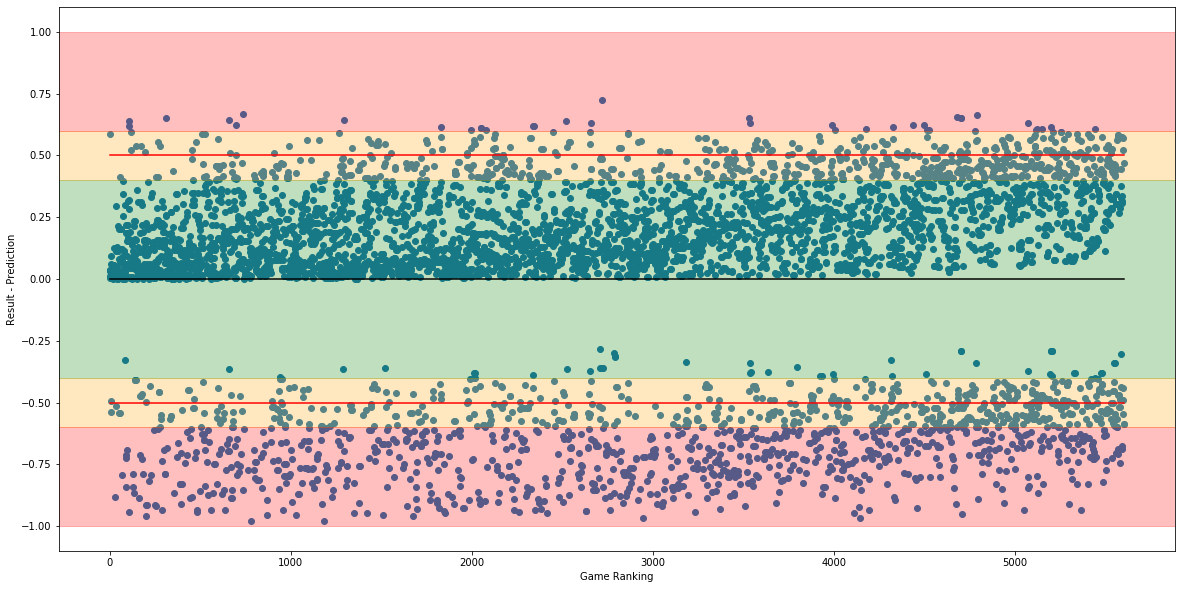

In [166]:
#Influence Plot
resid=np.array([])
val = []
v= []
for i in range(0,len(LogReg_Y_true)):
    val.append(LogReg_Y_true[i] - LogReg_Y_pred[i])
for item in val:
    v.append(item.values[0])
v1 = np.asarray(v)
print(v1)
uppery = [0.5,0.5]
lowery = [-0.5,-0.5]
x= [0,len(v1)]
game =list(range(0,len(v1)))
plt.figure(figsize = (20,10))
plt.scatter(np.asarray(game),v1)
plt.title("Prediction Residual")
plt.xlabel("Game Ranking")
plt.ylabel("Result - Prediction")
plt.plot(x,uppery,color = 'red')
plt.plot(x,lowery,color = 'red')
plt.plot(x,[0,0],color = 'black')


plt.axhspan(-.4,0.4, color='green', alpha=0.25)
plt.axhspan(-.6,-.4, color='orange', alpha=0.25)
plt.axhspan(.4,.6, color='orange', alpha=0.25)
plt.axhspan(-1,-0.6, color='red', alpha=0.25)
plt.axhspan(0.6,1, color='red', alpha=0.25)


plt.title("")

In [168]:
#2019 Winners
round1_2019=['Duke','UCF','Liberty','Virginia Tech','Maryland','LSU','Minnesota','Michigan St.','Gonzaga','Baylor','Murray St.','Florida St.','Texas Tech','Florida','Michigan','Virginia','Oklahoma','Oregon','UC Irvine','Villanova','Purdue','Iowa','Tennessee','North Carolina','Washington','Auburn','Kansas St.','Ohio St.','Houston','Wofford','Kentucky']
round2_2019=['Duke','Virginia Tech','LSU','Michigan St.','Gonzaga','Florida St.','Texas Tech','Michigan','Virginia','Oregon','Purdue','Tennessee','North Carolina','Auburn','Houston','Kentucky']
round3_2019=['Duke','Michigan St.','Gonzaga','Texas Tech','Virginia','Purdue','Auburn','Kentucky']
round4_2019=['Michigan St.','Texas Tech','Virginia','Auburn']
round5_2019=['Texas Tech','Virginia']

#2018 Winners
round1_2018=['UMBC','Kansas St.','Kentucky','Buffalo','Loyola Chicago','Tennessee','Nevada','Cincinnati','Xavier','Florida St.','Ohio St.','Gonzaga','Houston','Michigan','Texas A&M','North Carolina','Villanova','Alabama','West Virginia','Marshall','Florida','Texas Tech','Butler','Purdue','Kansas','Seton Hall','Clemson','Auburn','Syracuse','Michigan St.','Rhode Island','Duke']
round2_2018=['Kansas St.','Kentucky','Loyola Chicago','Nevada','Florida St.','Gonzaga','Michigan','Texas A&M','Villanova','West Virginia','Texas Tech','Purdue','Kansas','Clemson','Syracuse','Duke']
round3_2018=['Kansas St.','Loyola Chicago','Florida St.','Michigan','Villanova','Texas Tech','Kansas','Duke']
round4_2018=['Loyola Chicago','Michigan','Villanova','Kansas']
round5_2018=['Michigan','Villanova']

#Stored
correct64=[]
correct32=[]
correct16=[]
correct8=[]
correct4=[]

In [175]:
def GetMatchupData(team1,team2,RoundStats,year):
    filename = 'FullStats\FullSeasonStats_'+str(year)+'.csv'
    with open(filename,'r') as f:
        df = pd.read_csv(f)
    stats1 = df[df['Name'] == team1]
    stats2 = df[df['Name'] == team2]
    #print(stats1.Name)
    #print(stats2.Name)
    #print()
    if stats1.iloc[0]['Rank'] < stats2.iloc[0]['Rank']:
        AppendNewStats(stats1,stats2,RoundStats)
    else:
        AppendNewStats(stats2,stats1,RoundStats)
    return(0)

def SimulateGame(probabilities):
    winner=[]
    for prob in probabilities:
        HighProb = prob*100
        HighProb = round(HighProb)
        LowProb = 100-HighProb
        winner.append(random.choices([0,1],weights=(HighProb,LowProb)))
    return(winner)


def FindWinners(teams,winners):
    i=0
    count=0
    ret=[]
    while i < len(teams):
        index = i+ winners[count][0]
        ret.append(teams[index])
        count+=1
        i+=2
    return(ret)
        
        
def GetRoundProbabilities(teams,roundNumber,year):
    i=0
    RoundStats = {}
    while i < len(teams):
        GetMatchupData(teams[i],teams[i+1],RoundStats,year)
        i+=2
    bigStats1 = pd.DataFrame(data = RoundStats)
    bigStats =bigStats1.drop(['ConfLosses_LowerRank','ConfLosses_HigherRank','TotalWins_HigherRank','Name_HigherRank','Name_LowerRank','ConfWins_LowerRank'],axis=1)
    bigStats.to_csv('TempStorage.csv', index = False)
    with open('TempStorage.csv','r') as f:
        df1 = pd.read_csv(f)
    prob = logreg_model.predict(df1)
    ret = []
    factor = roundNumber/(1+roundNumber)
    for chances in prob:
        dif = chances-.5
        ret.append(chances-(dif*factor))
    return(ret)

In [186]:
bracket = open('2019Bracket.csv','r')
teams=[]


for i in bracket.readlines():
    teams.append(i.strip('\n'))
bracket.close()
R1Prob = GetRoundProbabilities(teams,0,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(teams,winner)
correct=0
count=0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round1_2019:
        correct+=1
correct64.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,1,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count=0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round2_2019:
        correct+=1
correct32.append(correct)



R1Prob = GetRoundProbabilities(WinningTeams,2,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round3_2019:
        correct+=1
correct16.append(correct)


R1Prob = GetRoundProbabilities(WinningTeams,3,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
correct = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round4_2019:
        correct+=1
correct8.append(correct)
    
    
R1Prob = GetRoundProbabilities(WinningTeams,3,2019)
winner = SimulateGame(R1Prob)
WinningTeams = FindWinners(WinningTeams,winner)
count = 0
for team in WinningTeams:
    #print(team+' prob = '+str(R1Prob[count]))
    #count+=1
    if team in round5_2019:
        correct+=1
correct4.append(correct)

In [187]:
average=[]
print("Iterations: "+str(len(correct64)))
average.append(sum(correct64)/len(correct64))
average.append(sum(correct32)/len(correct32))
average.append(sum(correct16)/len(correct16))
average.append(sum(correct8)/len(correct8))
average.append(sum(correct4)/len(correct4))
print (average[0]/32)
print (average[1]/16)
print (average[2]/8)
print (average[3]/4)
print (average[4]/2)
print("total Average = "+str(sum(average)/63))

Iterations: 10
0.715625
0.4125
0.2375
0.025
0.05
total Average = 0.5015873015873016
